In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Continuous Examples of Bayesian Methods


## Example - Unfair Coins

Suppose we have an unfair coin that returns heads with some probability p. (before we get into it, it is worth noting that you can buy such coins from a magic or toy shop). Before we gather any data, *Bayes Thinking* says that we should think of $p$ as being a random variable that can take values between 0 and 1. We could take a prior such as $f(p) = 2p$.  Note we might choose this prior if we suspect the coin is favored towards heads before we flip it.

In this case we are going to flip the coin once and call that our observation. So this is a case where we have a continuous prior and a discrete likliehood. We compute the likliehoods of observing a head or a tails:

$$ L( x=\mbox{heads} | p) = p \qquad L(x = \mbox{tails} | p) = 1-p $$

Then our total probability of observing x is given by:

$$ P(x=\mbox{heads}) = \int_0^1 L( x=\mbox{heads} | p) f(p) dp = \int_0^1 2 p^2 dp = \frac{2}{3} $$

$$ P(x=\mbox{tails}) = \int_0^1 L( x=\mbox{tails} | p) f(p) dp = \int_0^1 2 (1-p) p dp = $$

In [2]:
p = sp.Symbol('p')

sp.integrate( 2*(1-p)*p, (p, 0, 1) )

1/3

The *Posterior Estimate* in both cases then becomes:

$$ f(p | x=\mbox{heads}) = \frac{L( x=\mbox{heads}|p) f(p) }{ P(x=\mbox{heads}) } = 3 p^2 $$

and in the other case

$$ f(p | x=\mbox{tails}) = 6 (1-p)p $$

Depending on what we flip this then updates our result. You could imagine that what we then do is repeat this as we continue to flip the coin and record the results, and it continues to give variations on the beta distributions.

### Discussion

Note that our prior estimate was weighted towards heads, and the total probability we compute reflected that with 2/3 to 1/3. 

Note that the two results we conclude with are divergent. One is the result of the flip being heads and other the result of the flip being tails.


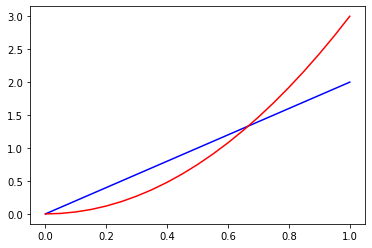

In [5]:
def posterior(p):

  return 3*p**2

def prior(p):

  return 2*p

pp = np.arange(0, 1.05, 0.05)
f_prior = prior(pp)
f_posterior = posterior(pp)

plt.plot(pp, f_prior, 'b-')
plt.plot(pp, f_posterior, 'r-')

## Flat Prior 

As we've learned an important step in Bayesian Analysis is understanding the role of the prior for our particular problem. In the ideal case we have enough data that our prior is submerged by the likliehoods of the data. However if the sample size is fixed, we may not be able to avoid effects of the prior. In the case of our coin for example, our initial prior was weighted towards heads.

We could try a *flat prior* which is just a unifromly distributed prior where every possibility is equally likely - again in the prior.

$$ f(p) = 1$$

Note that our likliehoods do not changed, however the total probabilities will:

$$ P( x = \mbox{heads}) = \int_0^1 p dp = \frac{1}{2} $$

and 

$$ P( x = \mbox{tails}) = \int_0^1 (1-p) dp = \frac{1}{2} $$

Then we compute the posterior estimates:

$$ f(p | x= \mbox{heads}) = 2 p $$

and 

$$ f(p | x=\mbox{tails}) = 2 (1- p) $$

### Discussion

Note the impressive symmetry. 

Note that our posterior in the event that the first flip is a head is precisely the prior we started with. 





## Using Our Posterior to Make a Prediction

So let's start with our flat prior, we flip the coin once and obtain a heads and our posterior estimate for the likliehood of p is now:  $$ f(p| x_1 = \mbox{heads} ) = 2p $$. 

We flip the coin again and get another heads so that our updated posterior is now:

$$ f(p | x_1 = x_2 = \mbox{heads}) = 3 p^2 $$

What do we think is going to happen next?

The likliehood that a third flip is a heads given the value of p then looks like:

$$ p(x_3 = \mbox{heads} | x_1=x_2 =\mbox{heads}) = \int L(x=\mbox{heads} | p) f(p | x_1 = x_2 = \mbox{heads}) = \int_0^1 3 p^3 dp = \frac{3}{4} $$

and therefore


$$ p(x_3 = \mbox{tails} | x_1=x_2 =\mbox{heads}) = \frac{1}{4} $$

## Credible Interval

Consider our first two flips being a heads starting from a flat prior:

$$ f(p| x_1 = x_2 = \mbox{heads}) = 3 p^2 $$

Let's construct a 90% credible interval for $p$. To do this we want to find an interval of $p$ space (in this case [0, 1]), (a, b) such that

$$ \int_a^b f(p|x_1 = x_2 = \mbox{heads}) dp = 0.90 $$

Note we can choose any a and b! What makes sense is to start our interval at the most likely value for p and then increase it in both directions until its mass is 0.90. Of course for our posterior the most likely $p$ is 1. So that will be our b as p cannot be bigger. Thus we choose a:

In [13]:
sp.integrate( 3*p**2, (p, 0.464, 1) )

0.900102656000000

## Is our coin unfair?

Do we have enough evidence to conclude the coin is not fair?

## Example - Radioactive Decay

An unknown radioactive isotope has a lifetime modeled by an exponential distribution:  $$L(x|\lambda) = \lambda \exp(-\lambda x) $$ 

With mean lifetime $1/\lambda$.  Suppose we detect a decay after x seconds. What is our estimate of the mean liftime for this isotope.

### Choosing a Prior

Note what we saw above, the prior we choose ended up being from the same class as the posterior, and in fact there was a whole chain of related priors and posteriors (or a tree more properly because it depended on the results of the flips) all coming from the Beta distribution. So one thing we might be looking for here is a prior PDF that is related to the underlying distribution, anticipating that this relationship may continue into the posterior.

Putting that observation aside. The other thing we want is a prior that makes sense and captures the range of possibilities for $\lambda$. Before any observation, the possibilities for $\lambda$ are that it could be a any positive number. 

We could take as a start that $\lambda$ is a random variable fitting an exponential distribution with mean 1:  

$ f(\lambda) = \exp( - \lambda) $ 

(note a good exam question would be:  why won't a flat prior work with this example?

### Total Probability of the observation

The total probability density of observation $x$ is then:

$$ g(x) = \int L(x|\lambda) f(\lambda) d\lambda = \int_0^\infty \lambda \exp(-\lambda x - \lambda) d\lambda $$

We get

$$  = \int_0^\infty \lambda \exp(- (x+1) \lambda) d\lambda  $$



In [16]:
llambda = sp.Symbol('llambda')
b = sp.Symbol('b')
sp.integrate( llambda* sp.exp(-(4+1)*llambda), (llambda, 0, b) )

(-5*b - 1)*exp(-5*b)/25 + 1/25

and

$$ g(x) = \frac{1}{(x+1)^2} $$



Combining this with the likliehood and prior we have the posterior estimate predicated on observation $x$, again expressed as a density:

$$ f(\lambda | x) =\frac{ L(x | \lambda) f(\lambda) }{g(x)} = \lambda (x+1)^2 \exp(-(x+1) \lambda) $$

Which is now a higher order gamma distribution.

In [17]:
# Let's plot for an observation x

def prior(llambda):
    
    return np.exp( -llambda) 

def posterior(llambda, x=5):
    
    return llambda*(x+1)**2 * np.exp( -(x+1)*llambda )

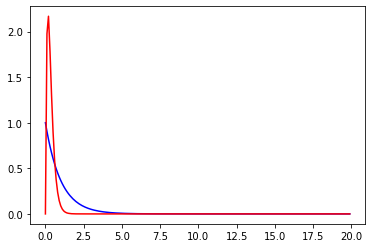

In [22]:
llambda = np.arange(0, 20, 0.1)
f  = prior(llambda)
ff = posterior(llambda, x=5)
plt.plot(llambda, f, 'b-')
plt.plot(llambda, ff, 'r-')

Remember that these are not probabilities of x, they are probabilities of $\lambda$ and that the expected value of $x$ is $1/\lambda$.

Now suppose we ask, after observing a decay at x=5 what we expect the next observation to be using our posterior.

$$ E(x_2) = \int_0^\infty \int_0^\infty x_2 L(x_2 | \lambda) f(\lambda | x_1=5) d\lambda dx_2 $$

$$ = \int_0^\infty \int_0^\infty 36 x_2 \lambda^2 e^{ - \lambda x_2 - 6 \lambda } d\lambda dx_2 $$ 

In [23]:
x2 = sp.Symbol('x2')
llambda = sp.Symbol('\lambda')
b = sp.Symbol('b')

sp.integrate( 36*x2*llambda**2 *sp.exp( - llambda*x2 - 6*llambda), (x2, 0, b) )

(-36*\lambda*b - 36)*exp(-\lambda*b - 6*\lambda) + 36*exp(-6*\lambda)

In [24]:
sp.integrate( 36* sp.exp(-6*llambda), (llambda, 0, b) )

6 - 6*exp(-6*b)

### Credible Interval for $\lambda$

Take our posterior for $x=5$:

$$ f(\lambda | x=5) = 36\lambda \exp( -6\lambda)$$

Use this to find a 99% credible interval for $\lambda$. Again this should be an interval (a, b) such that the density over it given by our posterior is 0.99 or greater.  Again we have all sorts of choices, but the most obvious would be to start at the maximum value.



In [25]:
# Let's use Calculus to find the maximum value

f = 36 * llambda * sp.exp(-6*llambda)
f.diff()

-216*\lambda*exp(-6*\lambda) + 36*exp(-6*\lambda)

In [26]:
llambda_max = 36/216
llambda_max

0.16666666666666666

In [38]:
# So we start with lambda_max and then move down and up from there. Note that we do not want to go smaller than 0.
sp.integrate( f, (llambda, 0, 1.16)).evalf()

0.992445191266655

In [39]:
1/1.16

0.8620689655172414

### Discussion

That's the game. The only barrier is whether the integrals being computed can be found exactly or not. 

Some general parting thoughts about Bayesian Methods:

- There are two points of view. One is that Bayesian Methods are an alternative way of thinking about statistics and experiments that is more intuitive and closer to what the meaning that a non-expert thinks we are using in describing conclusions.
- Another is that Bayesian Methods are one more tool. They are a tool that is useful if you are going to try and make a prediction following an experiment (what happens next). 
- In practice one has many observations not just one or two, and there are methods for doing Bayesian computations using lot's of observations in one go. It is beyond the scope of this class.

